In [74]:
%load_ext autoreload
%autoreload 2

import koopman as kp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


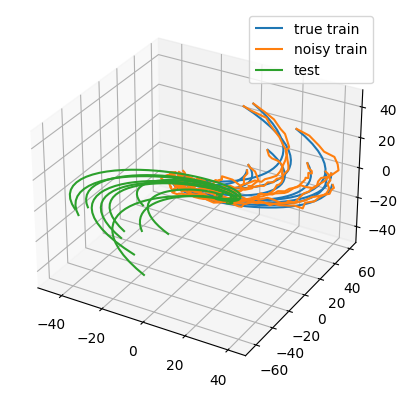

In [92]:
lds = kp.dynamics.LDS(A=[[-2, 0, 4], [4, 0, 4], [-4, -2, -4]])
true_train, noisy_train = lds.make_rand_trajs(0, 50, 5000, noise_var=1)
test = lds.make_rand_trajs(-50, 0, 1000, noise_var=0)
kp.utils.plot([true_train, noisy_train, test],
              target_dim=3,
              labels=["true train", "noisy train", "test"],
              max_lines=10)

In [109]:
net = kp.network.KoopmanNetwork(lds.dim)
net.train(noisy_train, autoencoder_epochs=50, autoencoder_batch_size=100, model_epochs=30, model_batch_size=10)

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 491.9980
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 304.3814
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 133.9477
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 80.8921
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 48.7077
Epoch 6/50
50/50 [==============================] - 0s 6ms/step - loss: 31.7579
Epoch 7/50
50/50 [==============================] - 0s 6ms/step - loss: 22.4874
Epoch 8/50
50/50 [==============================] - 0s 6ms/step - loss: 18.4261
Epoch 9/50
50/50 [==============================] - 0s 6ms/step - loss: 15.4972
Epoch 10/50
50/50 [==============================] - 0s 6ms/step - loss: 11.4153
Epoch 11/50
50/50 [==============================] - 0s 6ms/step - loss: 6.8466
Epoch 12/50
50/50 [==============================] - 0s 5ms/step - loss: 4.0447
Epoch 13/50
50/50 [=================

32/32 [==============================] - 0s 6ms/step


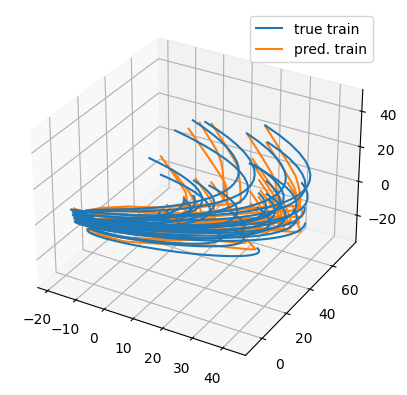

In [115]:
pred_train = net.predict(true_train[:, 0, :])
pred_test = net.predict(test[:, 0, :])
kp.utils.plot([true_train, pred_train], labels=["true train", "pred. train"])

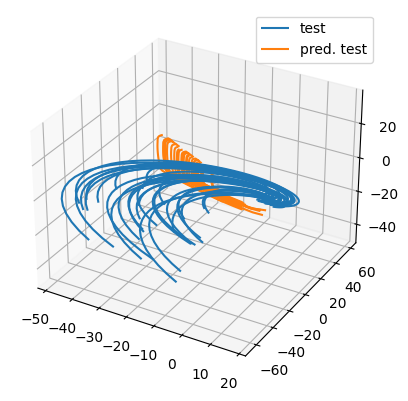

In [114]:
kp.utils.plot([test, pred_test], labels=["test", "pred. test"])